In [1]:
from pathlib import Path

mp3_dir = Path.cwd().parent / "data"
embs_dir = mp3_dir / "embs"
print(embs_dir, embs_dir.exists())

/home/louis/lab/qwen/audio/data/embs True


Filename: donatachi-2pop-reup-16m50s-sweat-drop
Duration: 20.088 seconds
Time steps: 2009


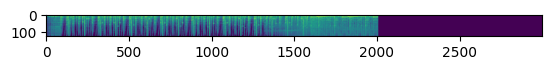

Filename: glacci-nest-10m-turns-to-love
Duration: 28.195 seconds
Time steps: 2820


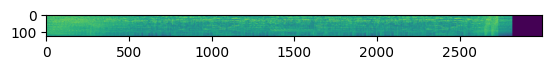

Filename: glacci-nest-10m-turns-to-love_10ms-clip
Duration: 0.015 seconds
Time steps: 2


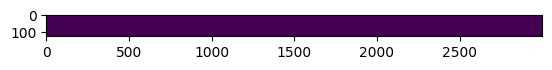

Filename: glacci-nest-10m-turns-to-love_13s-clip
Duration: 13.790 seconds
Time steps: 1380


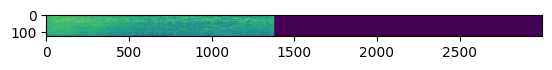

Filename: glacci-nest-10m-turns-to-love_2s-clip
Duration: 2.340 seconds
Time steps: 235


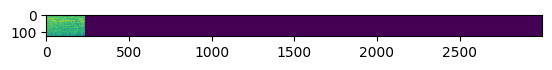

Filename: glacci-nest-10m-turns-to-love_8s-clip
Duration: 8.641 seconds
Time steps: 865


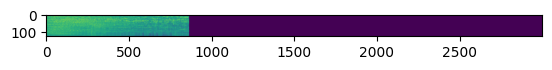

Filename: youtube_yXQViqx6GMY_audio
Duration: 235.008 seconds
Time steps: 3000


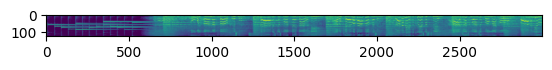

In [6]:
from matplotlib import pyplot as plt
import torch
import warnings
import librosa

for emb in sorted(embs_dir.iterdir()):
    if emb.suffix == ".pt":
        print("Filename:", emb.stem)
        source_file = (mp3_dir / emb.stem).with_suffix(".mp3")
        audio, sr = librosa.load(source_file, sr=None)
        duration = librosa.get_duration(y=audio, sr=sr)
        print(f"Duration: {duration:.3f} seconds")
        warnings.simplefilter(action="ignore", category=FutureWarning)
        emb_pt = torch.load(emb)
        inputs = emb_pt["inputs"]
        img = inputs["input_features"].numpy()
        print("Time steps:", inputs["feature_attention_mask"].sum().tolist())
        plt.imshow(img.squeeze())
        plt.show()